In [75]:
# Import the necessary packages below

import pandas as pd
import numpy as np
import requests
import string
import re
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from bs4 import BeautifulSoup
%matplotlib inline

## Q1: Apply PCA to user-movie ratings

(a) Read in the data and transform data frames.

i. Import the data from the csv file 'ratings.csv' into a pandas data frame. Each row corresponds to the rating given by a user to a particular movie. There is a header row that specifies the fields: userId, movieId, rating, timestamp. Transform the data into a movie-user ratings matrix such that rows refer to movies, columns refer to users, and each cell contains the rating for the associated movie/user pair. Assign a value of 0 for any missing values. (Note: For this operation, you can use the pivot_table() function in pandas with index as movie ids, columns as user ids, values as rating.)

ii. Import the data from the csv file 'movies.csv' into a pandas data frame. Each row corresponds to title and genre information for a particular movie. There is a header row that specifies the fields: movieId, title, genre. Each movie is associated with a list of genres, separated by '|'. Create a new column called 'firstGenre' that contains only the first genre from the list. You can do this easily with str.split().  Drop the original 'genre' column.

iii. Return the data frames from (i) and (ii).

In [76]:
# construct_data(ratingsFilename, genreFilename) takes as input the filenames to read 
# in data from (as specified above), converts the ratings data into a movie-user 
# dataframe df_A, and converts the movie data into a data frame df_B that includes a 
# 'firstGenre' column.
# You will use these dataframes in subsequent questions. 
def construct_data(ratingsFilename, genreFilename):  
    ###
    ### YOUR CODE HERE
    ###
    rat=pd.read_csv('ratings.csv')
    mov=pd.read_csv('movies.csv')
   
    #ratmov=pd.merge(rat,mov,on='movieId')
    rat=pd.pivot_table(rat,values='rating',index=['movieId'],columns=['userId'],fill_value=0)
    firstGenre=mov['genres'].str.split("|",expand=True)
    mov['firstGenre']=firstGenre[0]
    del mov['genres']
    #mov=pd.pivot_table(mov,values='rating',index=['movieId'],columns=['userId'],fill_value=0)
    
    return rat,mov
    #print(ratmov)

# Example: 
construct_data('ratings.csv', 'movies.csv') # -> (df_A 9724x610, df_B 9742x3)

(userId   1    2    3    4    5    6    7    8    9    10  ...   601  602  603  \
 movieId                                                   ...                   
 1          4  0.0  0.0    0    4    0  4.5    0    0  0.0 ...   4.0    0    4   
 2          0  0.0  0.0    0    0    4  0.0    4    0  0.0 ...   0.0    4    0   
 3          4  0.0  0.0    0    0    5  0.0    0    0  0.0 ...   0.0    0    0   
 4          0  0.0  0.0    0    0    3  0.0    0    0  0.0 ...   0.0    0    0   
 5          0  0.0  0.0    0    0    5  0.0    0    0  0.0 ...   0.0    0    0   
 6          4  0.0  0.0    0    0    4  0.0    0    0  0.0 ...   0.0    3    4   
 7          0  0.0  0.0    0    0    4  0.0    0    0  0.0 ...   0.0    0    0   
 8          0  0.0  0.0    0    0    3  0.0    0    0  0.0 ...   0.0    0    0   
 9          0  0.0  0.0    0    0    0  0.0    0    0  0.0 ...   0.0    0    0   
 10         0  0.0  0.0    0    0    3  0.0    2    0  0.0 ...   0.0    3    0   
 11         0  0

In [77]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [78]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(b) Apply PCA to the movie-user matrix A with a specified number of components k. Return the resulting explained variance ratio vector and the transformed data (converted back to a pandas dataframe). 

In [79]:
# apply_pca(df, k) takes as input a movie-user ratings dataframe and target number 
# of pca components k. The function should first mean center the data in the data 
# frame, them perform PCA with k components and transform the data. Return the pca
# attribute explained_variance_ratio_ that records the explained variance for each 
# of the k components, and the transformed data (in a new data frame).

def apply_pca(df, k):
    ###
    ### YOUR CODE HERE
    ###
   X_Scaled=preprocessing.scale(df,with_std=False)
   pca=decomposition.PCA(n_components=k)
   X_trans=pca.fit_transform(X_Scaled)
   
   transformed_df=pd.DataFrame(X_trans,index=df.index)


   return pca.explained_variance_ratio_ , transformed_df
df_A, df_B = construct_data('ratings.csv', 'movies.csv')
apply_pca(df_A, 2)  # -> (array([0.1762..., 0.0418...]), transformed_df 9724x2)

(array([0.17620942, 0.04189505]),                  0          1
 movieId                      
 1        36.086289  -6.566883
 2        18.250960  -0.545823
 3         5.901016  -5.712353
 4        -1.980883  -0.808687
 5         3.558845  -2.674353
 6        19.196081  -7.035264
 7         3.900148  -5.611254
 8        -1.034501  -0.565273
 9        -1.405491  -1.145129
 10       19.691371  -7.744535
 11        9.352151 -10.578314
 12       -0.080004  -0.051762
 13       -1.183441  -0.716087
 14       -0.447344  -3.181723
 15       -0.730494  -1.767996
 16       16.389912  -1.734975
 17        8.516639  -8.816036
 18        2.849232   0.002965
 19       11.288088   0.187943
 20        0.082542   0.721751
 21       12.378964 -14.346057
 22        3.379660  -4.560135
 23        0.595862  -1.010319
 24        2.591786  -2.642780
 25        8.233931  -9.186969
 26        0.355436  -1.861081
 27       -1.118838  -0.807566
 28        0.063528  -1.966849
 29        6.300092  -5.755834
 30   

In [80]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [81]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [82]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Join the data frames from Q1a (movie title and firstGenre) and Q1b (movies with dimensionality reduced by pca). The result should be a data frame with rows corresponding to movies, the first k columns should be the lower dimensional representation of user rating from pca, then the last three columns should be movieId, movie title, and firstGenre. Return the resulting data frame.


In [83]:
# join_movieDataFrames(pcaDF, genreDF) takes two data frames as input: (1) movies 
# after dimensionalilty reduction with pca, and (2) movies with title and first genre.
# The two data frames should be joined together, using movieId as a key, and returned 
# as a single data frame.

def join_movieDataFrames(pcaDF, genreDF):
    ###
    ### YOUR CODE HERE
    ###
    pcadDF1=pd.DataFrame(pcaDF,columns=pcaDF.columns)
    #print(pcaDF.columns.values)
    joined=pd.merge(pcaDF,genreDF,on='movieId')
    joined=joined[[0,1,'movieId', 'title', 'firstGenre']]
    #joined=pd.merge(pcaDF,genreDF,on='movieId')   
    #rat=pd.pivot_table(rat,values='rating',index=['movieId'],columns=['userId'],fill_value=0)
    return joined

(df_A, df_B) = construct_data('ratings.csv', 'movies.csv')
(exVar, df_T) = apply_pca(df_A, 2)
join_movieDataFrames(df_T, df_B) # -> joined_df (9724x5)

,0,1,movieId,title,firstGenre
0,36.086289,-6.567013,1,Toy Story (1995),Adventure
1,18.250960,-0.545754,2,Jumanji (1995),Adventure
2,5.901016,-5.712309,3,Grumpier Old Men (1995),Comedy
3,-1.980883,-0.808690,4,Waiting to Exhale (1995),Comedy
4,3.558845,-2.674349,5,Father of the Bride Part II (1995),Comedy
5,19.196081,-7.035214,6,Heat (1995),Action
6,3.900148,-5.611237,7,Sabrina (1995),Comedy
7,-1.034501,-0.565269,8,Tom and Huck (1995),Adventure
8,-1.405491,-1.145112,9,Sudden Death (1995),Action
9,19.691371,-7.744606,10,GoldenEye (1995),Action


In [84]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(d) Consider the color mapping of each genre below in the dictionary 'genre_color' to assign a color to each genre. 

Now, use the methods above to apply PCA and reduce the dimensionality of the movies using k=2, join the results to movie title and firstGenre, then plot the results as a scattterplot, coloring each movie according to its firstGenre using the color map below. 

This question will be graded manually. 

In [85]:
genre_color={'Animation': 'r', 'Horror': 'b', 'Thriller': 'y', 'Drama': 'm', 
        'Comedy': 'deeppink', 'Sci-Fi': 'gold', 'Western': 'orange', 'Adventure': 'g', 
        'Documentary': 'brown', 'Musical': 'indigo', 'Fantasy': 'yellow', 
        'Mystery': 'purple', 'Film-Noir': 'cyan', '(no genres listed)': 'coral', 
        'Action': 'teal', 'War': 'black', 'Romance': 'skyblue', 'Children': 'lime', 
        'Crime': 'darkgreen'}

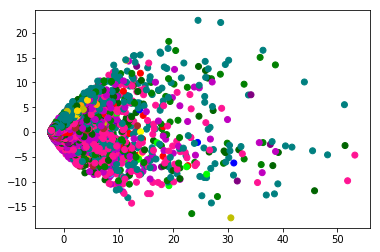

In [86]:
###
### YOUR CODE HERE
###
(df_A, df_B) = construct_data('ratings.csv', 'movies.csv')
(exVar, df_T) = apply_pca(df_A, 2)
x=join_movieDataFrames(df_T, df_B) 
plt.scatter(x[0],x[1],c=x.firstGenre.map(genre_color))

## Q2: Correlations on document-term matrix

In the question below, you will construct a document-term matrix, which is a 2-dimensional matrix that describes the frequency of terms (i.e., words) that occur in each document in a collection. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. The value in a given cell (i,j) counts the number of times the term j occurs in document i.
Reference: https://en.wikipedia.org/wiki/Document-term_matrix

The text file "urls.txt" contains a list of urls for the webpages to be parsed. Each line in the text file corresponds to a url. Use BeautifulSoup to fetch each webpage and parse the text as you did in HW1. Specifically,
1. For each webpage document, read the content and do the following:
    A. Retrieve all text enclosed in paragraph tags.
    B. Preprocess the text as follows:
        i. Convert to lowercase. 
        ii. Strip out punctuation using translate() with string.punctuation.
        iii. Tokenize based on whitespace separation. Note: use strip() to 
        remove all trailing whitespsace characters.
    
2. Find the set of unique words across all the documents and sort them in lexicographic order. This comprises the "vocabulary" of the corpus. Each term in the vocabulary will be a feature in the document-term matrix you will construct next. Do not add the empty string to the vocabulary. 

For the above two parts, you can use the functions/code specified below, or you can use your code from previous homeworks, or you can write your own functions. 

In [87]:
def preprocess(untokenizedWords): 
    tokenizedWords = []
    for line in untokenizedWords:
        text = line.translate(str.maketrans('','',string.punctuation))
        text = text.strip().split();
        for i in range(len(text)):
            word = text[i].strip().lower();
            tokenizedWords.append(word.strip());        
    return (tokenizedWords)


In [88]:
# Function to read the urls from the file and return them as a list.

def getListOfUrls(filename):
    listOfUrls = [];
    with open(filename) as f:
        for line in f:
            url = line.split("\n")[0];
            listOfUrls.append(url);
    return listOfUrls

getListOfUrls("urls.txt")

['https://datajobs.com/what-is-data-science',
 'https://www.cs.purdue.edu/about/diversity.html',
 'https://en.wikipedia.org/wiki/Data_science']

In [89]:
# Function that parses each url and returns the list of toeknized and preprocessed words, 
# that are used to create the vocabulary next.

def parse(listOfUrls):
    
    # list of tokenized (and preprocessed) words across all the documents
    listOfWordsInDocuments = []; 
    
    # parse each webpage (url)
    for url in listOfUrls:   
        
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        # find all the paragraph tags 
        listOfp = soup.find_all('p') 
        # list of strings to accumulate all the content inside the different paragraph tags in a url.
        listOfText = []  
        for content in listOfp:
            # get the content in each paragraph tag, as a string.
            text = content.get_text(); 
            listOfText.append(text) 
        # preprocess the content inside each url to get a list of tokenized words.
        words_doc = preprocess(listOfText) 
        # collect the tokenized words in each document.
        listOfWordsInDocuments.append(words_doc); 

    return listOfWordsInDocuments

In [90]:
# Function to create the vocabulary that is returned as a list of words (strings). 

def createVocabulary(listOfWordsInDocuments):
    
    vocabulary = set() 
    for words_doc in listOfWordsInDocuments:
        for word in words_doc:
            if(word!=''): # check if the word is not an empty string.
                vocabulary.add(word)    
    vocabulary = list(vocabulary) 
    vocabulary = sorted(vocabulary);
    return vocabulary

(a) Now, create the document-term data frame, where the value of the cell (i,j) in the data frame is the frequency of the term j in document i. The number of columns of the document-term matrix will correspond to the number of unique words in the vocabulary, and the number of rows will correspond to the number of documents (i.e., webpages in urls.txt). Each term is represented by a column of the document-term data frame. Each document is represented by a row of the document-term dataframe (ordered by the order of the URLs given in the file). 

Return the document-term data frame obtained with columns as the vocabulary and index as the document id of the url, which is the order in which the urls appear, that is, first url in the file will have a document id of 1, second url will have a document id of 2, and so on. 

In [112]:
# createDocumentTermDataFrame(filename) takes as input the filenames to readin data from and 
# returns the document-term data frame as specified above.
# You will use these dataframes in subsequent questions. 

# Example: 
# createDocumentTermDataFrame('urls.txt') -> df_doc_term 
import requests
tex=""F.l"
tex=tex.translate(str.maketrans('','',string.punctuation)).lower(); 
print(tex)
def createDocumentTermDataFrame(filename):
    ###
    ### YOUR CODE HERE
    ###
    fileMap = {}
    unique=preprocess(createVocabulary(parse(getListOfUrls(filename))))
    fileList = getListOfUrls(filename)
    numFiles = len(fileList)
    numWords = len(unique)
    termMatrix = np.zeros((numFiles,numWords))
    
    for filename in fileList:
        page=requests.get(filename)
        soup = BeautifulSoup(page.content, 'html.parser')
        listOfp = soup.find_all('p') 
        listOfText = []
        wordmap={}
        for content in listOfp:
            # get the content in each paragraph tag, as a string.
            text = content.get_text()
            translator = str.maketrans('', '', string.punctuation)
            text=text.translate(translator)
            text=text.translate(str.maketrans('','',string.punctuation)).lower(); 
            listOfText.append(text) 
        words_doc = preprocess(listOfText)
      
        # collect the tokenized words in each document.
        for word in words_doc:
            if len(word)>0:
                if word not in wordmap.keys():
                    wordmap[word]=0
                wordmap[word]=wordmap[word]+1
        fileMap[filename]=wordmap
   
    # add words to overall list of words

# loop over each wordmap
    for file in fileList:
        rowIdx = fileList.index(file)
        tmpWordMap = fileMap[file]
        for token in tmpWordMap.keys():
            # find location of word
            colIdx = unique.index(token)
            # update count for appropriate cell of matrix
            termMatrix[rowIdx,colIdx]=tmpWordMap[token]
      
    return pd.DataFrame(termMatrix,columns=unique,index=fileList)

createDocumentTermDataFrame('urls.txt') # (3x1244 on 23 June 2020)

fl


,1,12,1962,1974,1985,1990s,1992,1996,1997,1998,...,yau,year,years,you,,,©,“data,“knowledge,•
https://datajobs.com/what-is-data-science,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,7.0,2.0,0.0,0.0,0.0,0.0
https://www.cs.purdue.edu/about/diversity.html,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
https://en.wikipedia.org/wiki/Data_science,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0


In [92]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


##### (b) Using the data frame from Q1a, consider the words: 'data', 'business', 'companies', 'mining', 'statistics', 'science'. Return a dictionary with the words as keys and the values as a list of their corresponding term frequencies for each document, (word: [list of frequencies]).

Example:

data	[105.0, 0.0, 57.0]
science	[22.0, 16.0, 31.0]


The above values are for the first three webpage urls given in the file "urls.txt". The frequencies should be listed in the order of the urls given in "urls.txt".

In [93]:
# getTermFrequencies(df_doc_term) takes as input the document-term data frame, and returns a dictionary with the above
# specified words as keys and the values as a list of their corresponding term frequencies for each document.

def getTermFrequencies(df_doc_term): 
    ###
    ### YOUR CODE HERE
    ###
    col=['data', 'business', 'companies', 'mining', 'statistics', 'science']
    wordmap={}
    for i in col:
        wordmap[i]=list(df_doc_term[i].values) 
    return wordmap
    
# Example:
df_doc_term = createDocumentTermDataFrame('urls.txt')
getTermFrequencies(df_doc_term)
# Order may vary
# {'business': [17.0, 0.0, 1.0],
#  'companies': [1.0, 1.0, 2.0],
#  'data': [105.0, 0.0, 57.0],
#  'mining': [2.0, 0.0, 2.0],
#  'science': [22.0, 16.0, 31.0],
#  'statistics': [5.0, 0.0, 15.0]}

{'data': [105.0, 0.0, 57.0],
 'business': [17.0, 0.0, 1.0],
 'companies': [1.0, 1.0, 2.0],
 'mining': [2.0, 0.0, 2.0],
 'statistics': [5.0, 0.0, 15.0],
 'science': [22.0, 16.0, 37.0]}

In [94]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Calculate the correlation between the two documents here.

In [95]:
# findCorrelation(filename, doc_1, doc_2) takes as input the file to read in data from and the document ids, 
# doc_1 and doc_2 of two documents, and returns the correlation between the documents with the document vector
# as the frequencies of the words in the vocabulary.
def findCorrelation(filename, doc_1, doc_2):
    ###
    ### YOUR CODE HERE
    ###
   
   d=((createDocumentTermDataFrame(filename)))
   df=d.iloc[[doc_1,doc_2]]
   
   return (d.iloc[doc_1]).corr(d.iloc[doc_2])
findCorrelation('urls.txt',1,2) # -> 0.6119...

0.6444443498453007

In [96]:
    ###
    ### AUTOGRADER TEST - DO NOT REMOVE
    ###


In [97]:
    ###
    ### AUTOGRADER TEST - DO NOT REMOVE
    ###


In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(d) For every word, find its average frequency across all documents. Then create a new document-term data frame with the same dimensions as above. For the value of cell (i,j), set the value to +1 if the frequency of word j in document i is greater than the average frequency of word j, otherwise set it to -1. 

Return the transformed document-term data frame with the same columns and index as for the document-term data frame in Q2 a.

In [99]:
# transformDocumentTermDataFrame(df_doc_term) takes as input the document term dataFrame df_doc_term obtained in Q2 a,
# performs the above described transformation, and returns the transformed dataframe.


def transformDocumentTermDataFrame(df_doc_term):
    
    ###
    ### YOUR CODE HERE
    ###
    meancol= df_doc_term.mean(axis=0)
   
    for i in range(len(df_doc_term.index)):
        for j in range(len(df_doc_term.columns)):
            if (df_doc_term.iloc[i,j]>meancol.iloc[j]):
                df_doc_term.iloc[i,j]=1
            if((df_doc_term.iloc[i,j]<=meancol.iloc[j])):
                   df_doc_term.iloc[i,j]=-1
    return df_doc_term
df_doc_term = createDocumentTermDataFrame('urls.txt')
transformDocumentTermDataFrame(df_doc_term) # 3x1244 on 23 June 2020, data should be transformed as described above.

,1,12,1962,1974,1985,1990s,1992,1996,1997,1998,...,yau,year,years,you,,,©,“data,“knowledge,•
https://datajobs.com/what-is-data-science,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
https://www.cs.purdue.edu/about/diversity.html,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
https://en.wikipedia.org/wiki/Data_science,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [100]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [101]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [102]:
# findCorrelation_T(filename, doc_1, doc_2) takes as input the file to read in data from and the document ids, 
# doc_1 and doc_2 of two documents, and gets the transformed dataframe using the above function, and
# returns the correlation between the documents with the document vector as the transformed values of the words in 
# the vocabulary.

def findCorrelation_T(filename, doc_1, doc_2):
    
    ###
    ### YOUR CODE HERE
    ###
   x=transformDocumentTermDataFrame(createDocumentTermDataFrame(filename))
   
   return (x.iloc[doc_2]).corr((x.iloc[doc_1])) 
    
findCorrelation_T('urls.txt', 1, 2) # -> -0.453... as of 23 June 2020

-0.22844011052071397

In [103]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [104]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [105]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(f) Now, find the correlation between different documents and plot the correlation matrix as a heatmap. Note that you need to use the original document term dataframe obtained in Q2 a, and not the transformed one. 

Note that this question will be graded manually. 

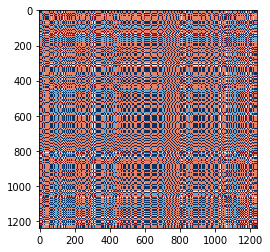

In [106]:
###
### YOUR CODE HERE
###
plt.imshow((createDocumentTermDataFrame('urls.txt')).corr(),cmap='RdBu')